In [9]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor
from pytorch_lightning.loggers import WandbLogger
from torch.utils.data import DataLoader

from src.models.BarlowTwinsVQVAE import BarlowTwinsVQVAE

from src.preprocessing.augmentations import Augmentations
from src.preprocessing.preprocess_ucr import AugUCRDataset, UCRDataset, UCRDatasetImporter
from src.preprocessing.data_pipeline import build_data_pipeline
from src.utils import load_yaml_param_settings
from src.utils import save_model

import numpy as np

import matplotlib.pyplot as plt

In [10]:
config_dir = 'src/configs/config.yaml' #dir to config file

config = load_yaml_param_settings(config_dir)

# data pipeline
dataset_importer = UCRDatasetImporter(**config['dataset'])
batch_size = config['dataset']['batch_sizes']['vqvae']
train_data_loader_non_aug, test_data_loader= [build_data_pipeline(batch_size, dataset_importer, config, kind, shuffle_train=False) for kind in ['train', 'test']]

augmentations = ['slice', 'jitter']
train_data_loader_aug = build_data_pipeline(batch_size, dataset_importer, config, "train",  augmentations, shuffle_train=False)

for batch in train_data_loader_aug:
    subxs, y = batch
    x1, x2 = subxs
    break

for batch in train_data_loader_non_aug:
    x, y_ = batch

self.X_train.shape: (500, 140)
self.X_test.shape: (4500, 140)
# unique labels (train): [0 1 2 3 4]
# unique labels (test): [0 1 2 3 4]


In [11]:
x1.shape

torch.Size([128, 1, 140])

In [12]:
x.shape[-1]

140

In [13]:
from src.models.BarlowTwinsVQVAE import BarlowTwinsVQVAE
input_length = train_data_loader_non_aug.dataset.X.shape[-1]
m = BarlowTwinsVQVAE(input_length, test_data_loader, train_data_loader_non_aug, config, len(train_data_loader_non_aug))

from src.models.vqvae import VQVAE
m_r = VQVAE(input_length, test_data_loader, train_data_loader_non_aug, config, len(train_data_loader_non_aug))

1
1


In [14]:

x1 = x1.squeeze(1)
x2 = x2.squeeze(1)

In [15]:

j = np.random.randint(0, len(x1))
print(y[j])
print(len(x1))
print(len(y))
x1 = x1.squeeze(1)
x2 = x2.squeeze(1)
x = x.squeeze(1)
#plt.plot(x2[j])



tensor([0])
128
128


In [16]:
zs, ys = 

SyntaxError: invalid syntax (2890799038.py, line 1)

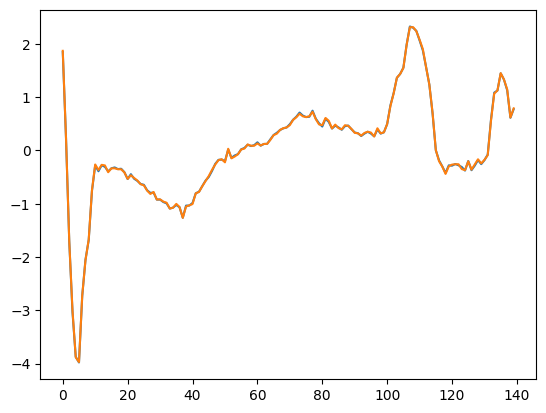

In [ ]:
j = np.random.randint(0, len(x1))
plt.plot(x1[j])
plt.plot(x2[j])

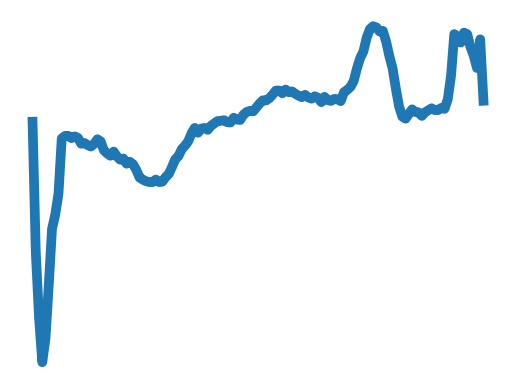

In [ ]:
plt.plot(x1[11], linewidth=7)
plt.axis('off')
plt.savefig("view1.png", transparent=True)
plt.show()

/tmp/ipykernel_73317/1536330491.py:1: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=140).
  plt.specgram(x1[j])


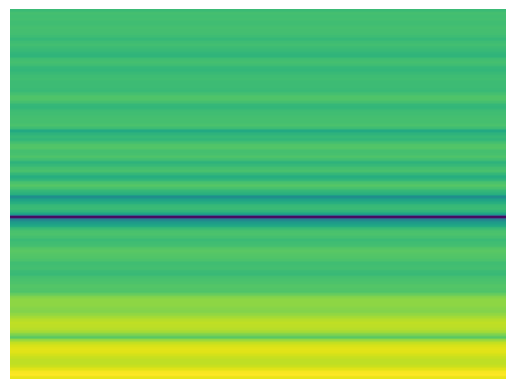

In [ ]:
plt.specgram(x1[j])
plt.axis('off')
plt.savefig("spectogram.png", transparent=True)

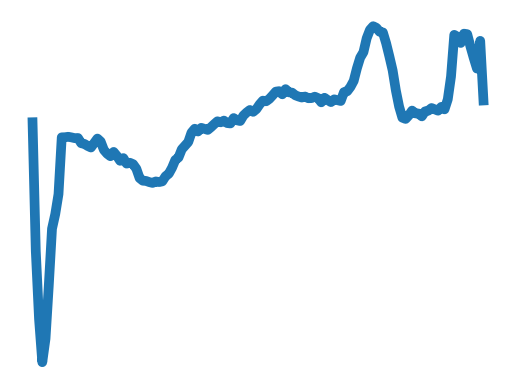

In [ ]:
plt.plot(x2[11], linewidth=7)
plt.axis('off')
plt.savefig("view2.png", transparent=True)
plt.show()

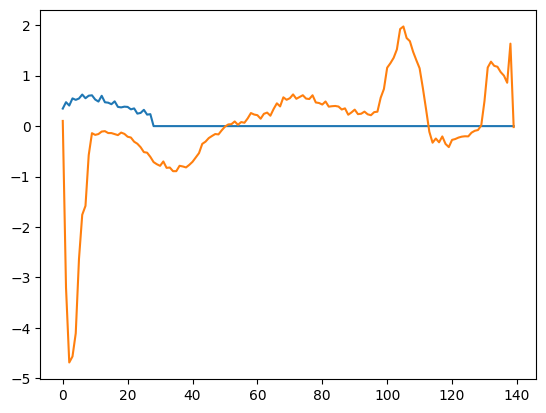

In [ ]:
i = 10
plt.plot(x2[i])
plt.plot(x1[i])

In [ ]:
zs, ys = m.encode_data(train_data_loader_non_aug, m.encoder, cuda=False)

In [ ]:
import umap
import torch

In [ ]:
pr = umap.UMAP().fit_transform(torch.flatten(zs, start_dim=1))

/home/erlendlokna/Documents/ntnu/representation-learning-VQ-VAE/.venv/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


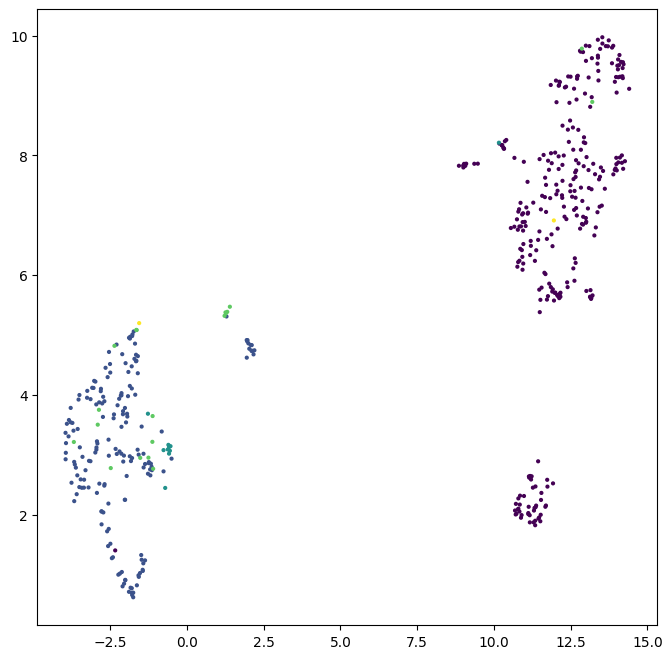

In [ ]:
f, a = plt.subplots(figsize=(8, 8))
a.scatter(pr[:, 0], pr[:, 1], c=ys, s=4)

In [ ]:
from src.experiments.tests import kmeans_clustering_silhouette
zs = torch.flatten(zs, start_dim=1)
sils = kmeans_clustering_silhouette(zs, ys)

In [ ]:
plt.bar(range(len(sils)), sils)
plt.xlabel('Cluster Index')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-means Clusters')
plt.show()

(-0.41485983, 0.0)